# SECTION 1: Setup and Data Loading

In [ ]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

✅ All libraries imported successfully!


# SECTION 2: Load Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("cleaned_data.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset shape: (2000, 29)
Columns: ['user_id', 'age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'mental_health_score', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day', 'gender_Female', 'gender_Male', 'gender_Other', 'location_type_Rural', 'location_type_Suburban', 'location_type_Urban']


# SECTION 3: Initial Data Exploration

In [ ]:
# Display basic information about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nDataset info:")
df.info()

print(f"\nBasic statistics:")
display(df.describe())

# Check data types
print(f"\nData types:")
print(df.dtypes)

DATASET OVERVIEW
Dataset dimensions: 2000 rows × 29 columns

Column names:
 1. user_id
 2. age
 3. daily_screen_time_hours
 4. phone_usage_hours
 5. laptop_usage_hours
 6. tablet_usage_hours
 7. tv_usage_hours
 8. social_media_hours
 9. work_related_hours
10. entertainment_hours
11. gaming_hours
12. sleep_duration_hours
13. sleep_quality
14. mood_rating
15. stress_level
16. physical_activity_hours_per_week
17. mental_health_score
18. uses_wellness_apps
19. eats_healthy
20. caffeine_intake_mg_per_day
21. weekly_anxiety_score
22. weekly_depression_score
23. mindfulness_minutes_per_day
24. gender_Female
25. gender_Male
26. gender_Other
27. location_type_Rural
28. location_type_Suburban
29. location_type_Urban

First 5 rows:


,user_id,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
0,user_1,51,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,...,125.2,13,15,4.0,1.0,0.0,0.0,0.0,0.0,1.0
1,user_2,64,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,...,150.4,19,18,6.5,0.0,1.0,0.0,0.0,1.0,0.0
2,user_3,41,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,...,187.9,7,3,6.9,0.0,0.0,1.0,0.0,1.0,0.0
3,user_4,27,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,...,73.6,7,2,4.8,0.0,0.0,1.0,1.0,0.0,0.0
4,user_5,55,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,217.5,8,10,0.0,0.0,1.0,0.0,0.0,0.0,1.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   daily_screen_time_hours           2000 non-null   float64
 3   phone_usage_hours                 2000 non-null   float64
 4   laptop_usage_hours                2000 non-null   float64
 5   tablet_usage_hours                2000 non-null   float64
 6   tv_usage_hours                    2000 non-null   float64
 7   social_media_hours                2000 non-null   float64
 8   work_related_hours                2000 non-null   float64
 9   entertainment_hours               2000 non-null   float64
 10  gaming_hours                      2000 non-null   float64
 11  sleep_duration_hours              2000 non-null   floa

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,...,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,...,148.07970,9.887500,10.04900,10.753750,0.467500,0.441000,0.091500,0.198000,0.302500,0.499500
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,...,48.86066,6.027853,6.05334,7.340269,0.499067,0.496631,0.288391,0.398592,0.459455,0.500125
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,...,0.80000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,...,113.90000,5.000000,5.00000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,...,147.45000,10.000000,10.00000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,...,180.70000,15.000000,15.00000,15.800000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,...,364.90000,20.000000,20.00000,36.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Data types:
user_id                              object
age                                   int64
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours                  float64
entertainment_hours                 float64
gaming_hours                        float64
sleep_duration_hours                float64
sleep_quality                         int64
mood_rating                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
mental_health_score                   int64
uses_wellness_apps                    int64
eats_healthy                          int64
caffeine_intake_mg_per_day          float64
weekly_anxiety_score                  int64
weekly_depression_score               int64
mindfulness_minutes

# SECTION 4: Target Variable Analysis

TARGET VARIABLE ANALYSIS
Mental Health Score Statistics:
Min: 20
Max: 80
Mean: 49.65
Median: 49.00
Standard Deviation: 17.55


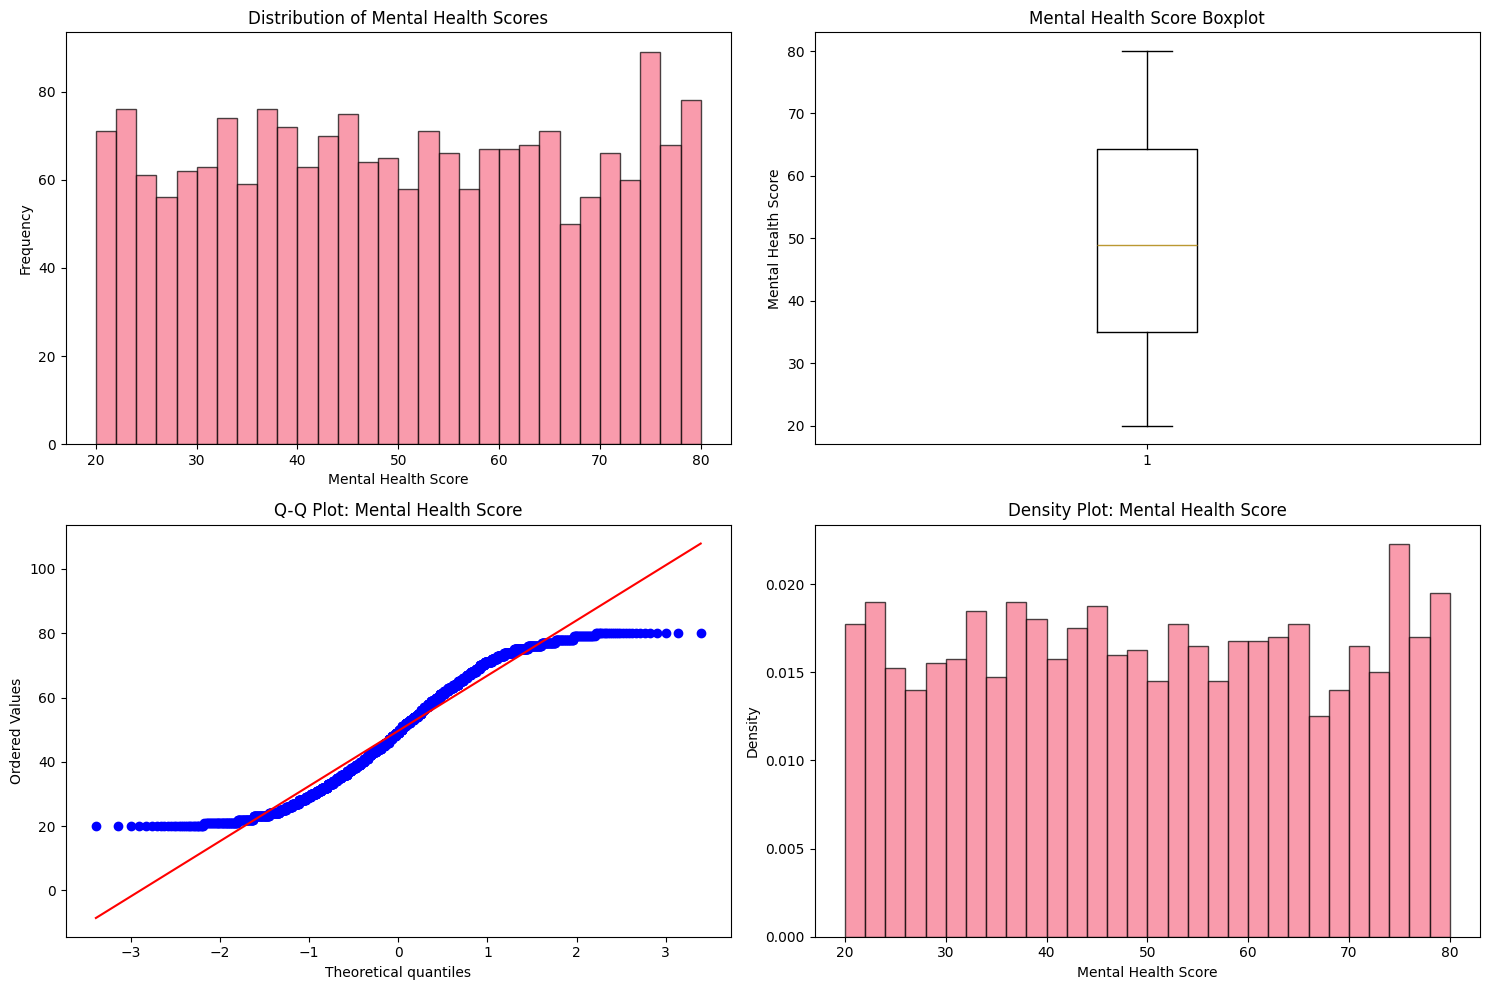

In [ ]:
# Analyze the target variable (mental_health_score)
print("="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

# Basic statistics for target variable
print("Mental Health Score Statistics:")
print(f"Min: {df['mental_health_score'].min()}")
print(f"Max: {df['mental_health_score'].max()}")
print(f"Mean: {df['mental_health_score'].mean():.2f}")
print(f"Median: {df['mental_health_score'].median():.2f}")
print(f"Standard Deviation: {df['mental_health_score'].std():.2f}")

# Create visualizations for target variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0,0].hist(df['mental_health_score'], bins=30, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Mental Health Scores')
axes[0,0].set_xlabel('Mental Health Score')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(df['mental_health_score'])
axes[0,1].set_title('Mental Health Score Boxplot')
axes[0,1].set_ylabel('Mental Health Score')

# Q-Q plot to check normality
from scipy import stats
stats.probplot(df['mental_health_score'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot: Mental Health Score')

# Density plot
axes[1,1].hist(df['mental_health_score'], bins=30, density=True, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Density Plot: Mental Health Score')
axes[1,1].set_xlabel('Mental Health Score')
axes[1,1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# SECTION 5: Feature Engineering and Data Preparation

In [ ]:
print("="*60)
print("FEATURE ENGINEERING & DATA PREPARATION")
print("="*60)

# Create a copy for processing
df_processed = df.copy()

# Remove user_id as it's not predictive
if 'user_id' in df_processed.columns:
    df_processed = df_processed.drop('user_id', axis=1)
    print("Removed 'user_id' column")

# Define feature categories for better understanding
categorical_features = ['gender_Female', 'gender_Male', 'gender_Other',
                       'location_type_Rural', 'location_type_Suburban', 'location_type_Urban']

numerical_features = ['age', 'daily_screen_time_hours', 'phone_usage_hours',
                     'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours',
                     'social_media_hours', 'work_related_hours', 'entertainment_hours',
                     'gaming_hours', 'sleep_duration_hours', 'physical_activity_hours_per_week',
                     'caffeine_intake_mg_per_day', 'mindfulness_minutes_per_day']

ordinal_features = ['sleep_quality', 'mood_rating', 'stress_level',
                   'weekly_anxiety_score', 'weekly_depression_score']

binary_features = ['uses_wellness_apps', 'eats_healthy']

target_variable = 'mental_health_score'

print(f"Categorical features (one-hot encoded): {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Ordinal features: {len(ordinal_features)}")
print(f"Binary features: {len(binary_features)}")
print(f"Target variable: {target_variable}")

# Verify all columns are accounted for
all_features = categorical_features + numerical_features + ordinal_features + binary_features + [target_variable]
missing_cols = set(df_processed.columns) - set(all_features)
extra_cols = set(all_features) - set(df_processed.columns)

if missing_cols:
    print(f"Columns in dataset but not categorized: {missing_cols}")
if extra_cols:
    print(f"Categorized columns not in dataset: {extra_cols}")
if not missing_cols and not extra_cols:
    print("All columns properly categorized!")

print(f"\nFinal dataset shape: {df_processed.shape}")


FEATURE ENGINEERING & DATA PREPARATION
✅ Removed 'user_id' column
Categorical features (one-hot encoded): 6
Numerical features: 14
Ordinal features: 5
Binary features: 2
Target variable: mental_health_score
✅ All columns properly categorized!

Final dataset shape: (2000, 28)


# SECTION 6: Exploratory Data Analysis

EXPLORATORY DATA ANALYSIS


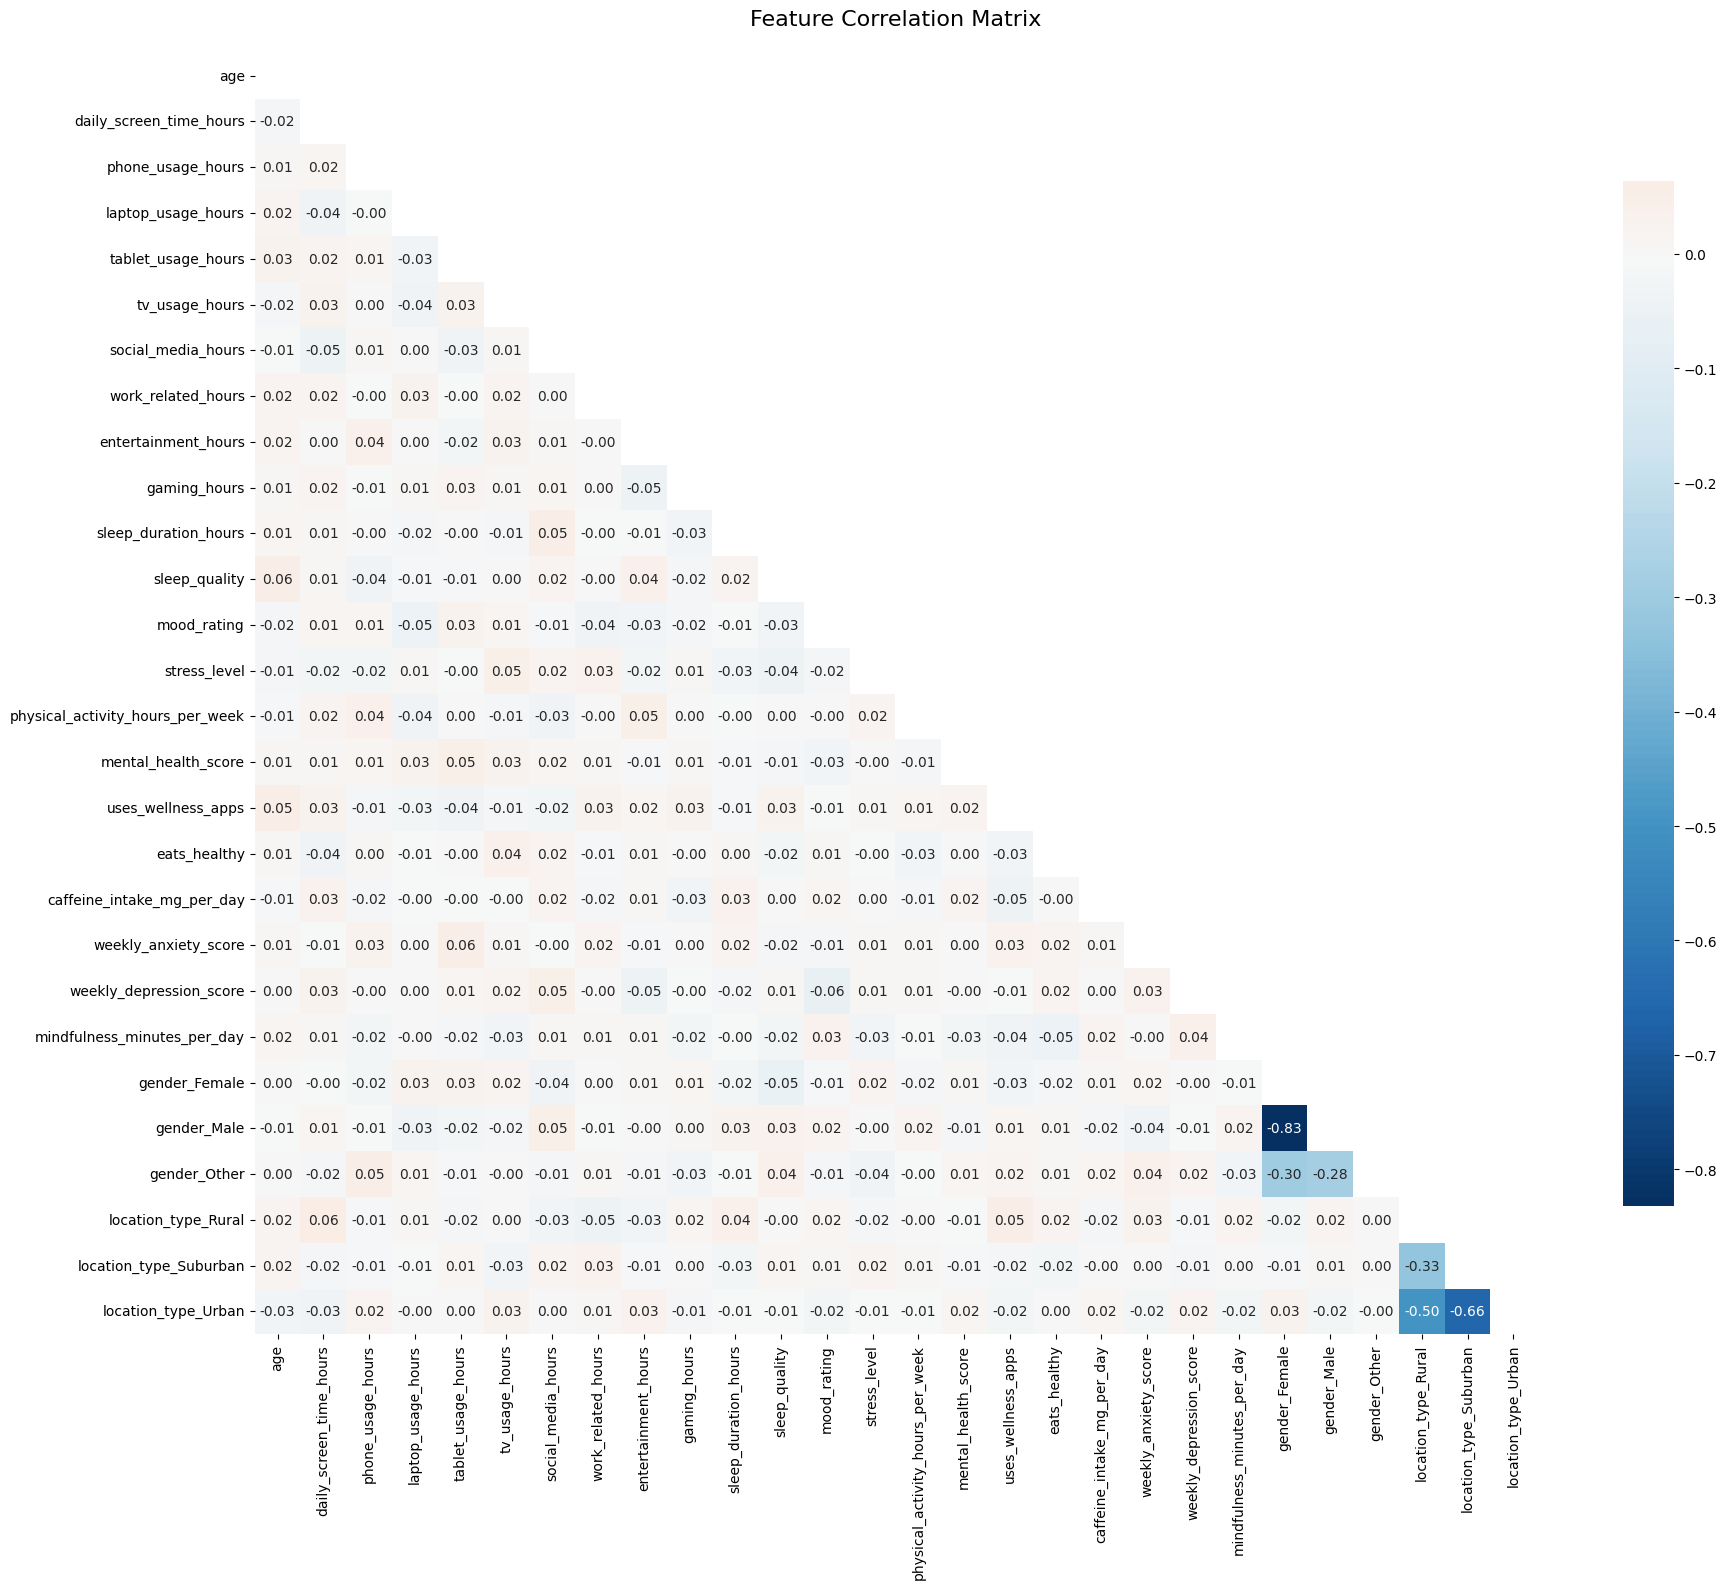

Correlations with Mental Health Score:
tablet_usage_hours                 :  0.046
laptop_usage_hours                 :  0.030
mood_rating                        : -0.028
mindfulness_minutes_per_day        : -0.026
tv_usage_hours                     :  0.026
uses_wellness_apps                 :  0.025
caffeine_intake_mg_per_day         :  0.022
location_type_Urban                :  0.016
social_media_hours                 :  0.016
phone_usage_hours                  :  0.015
gender_Male                        : -0.014
sleep_quality                      : -0.014
physical_activity_hours_per_week   : -0.014
gender_Other                       :  0.013
location_type_Suburban             : -0.013
entertainment_hours                : -0.012
sleep_duration_hours               : -0.011
age                                :  0.009
gaming_hours                       :  0.009
gender_Female                      :  0.007
daily_screen_time_hours            :  0.006
work_related_hours                 : 

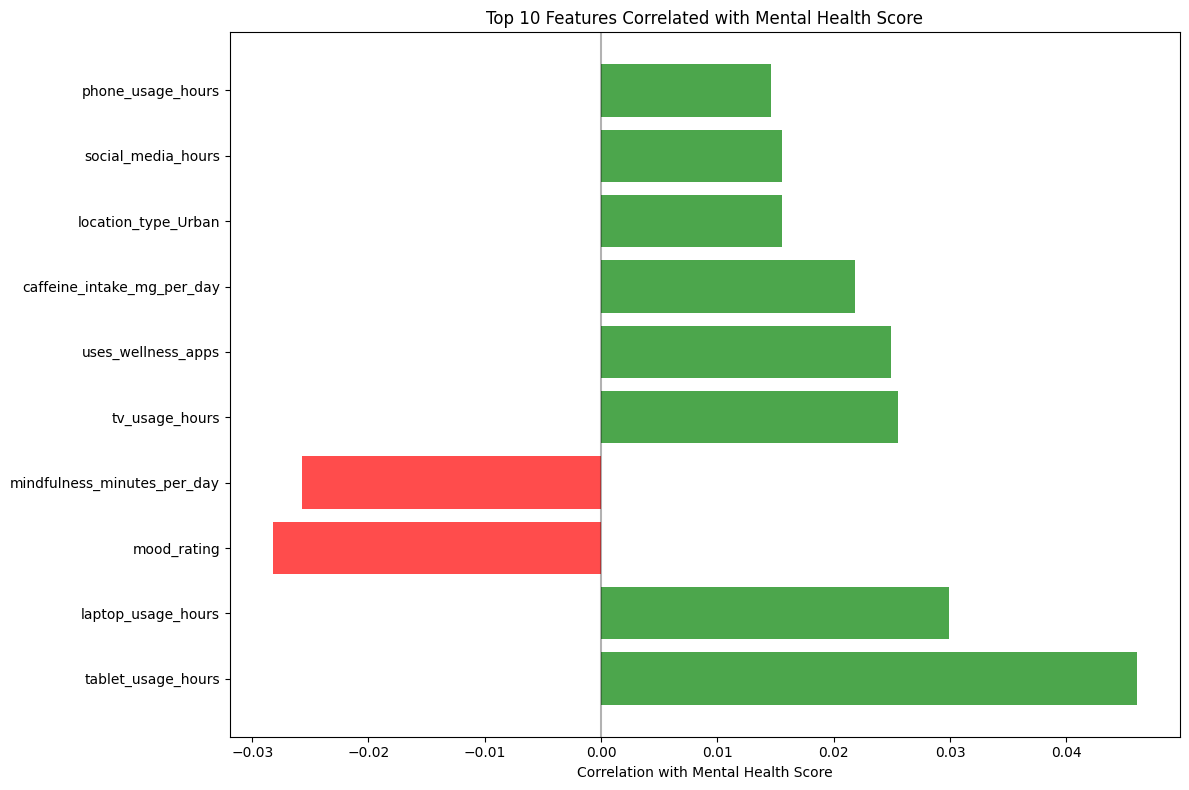

In [ ]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Correlation analysis
correlation_matrix = df_processed.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Correlation with target variable
target_correlations = df_processed.corr()[target_variable].sort_values(key=abs, ascending=False)
print("Correlations with Mental Health Score:")
print("="*40)
for feature, corr in target_correlations.items():
    if feature != target_variable:
        print(f"{feature:35s}: {corr:6.3f}")

# Visualize top correlations
top_correlations = target_correlations.drop(target_variable).head(10)
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in top_correlations.values]
bars = plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Correlation with Mental Health Score')
plt.title('Top 10 Features Correlated with Mental Health Score')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# SECTION 7: Data Splitting

In [ ]:
print("="*60)
print("DATA SPLITTING")
print("="*60)

# Separate features and target
X = df_processed.drop(target_variable, axis=1)
y = df_processed[target_variable]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature names:")
for i, feature in enumerate(X.columns, 1):
    print(f"{i:2d}. {feature}")

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\n Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set percentage: {X_train.shape[0] / X.shape[0] * 100:.1f}%")
print(f"Test set percentage: {X_test.shape[0] / X.shape[0] * 100:.1f}%")

# Check target distribution in splits
print(f"\nTarget variable distribution:")
print(f"Training set - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test set - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

DATA SPLITTING
Features (X) shape: (2000, 27)
Target (y) shape: (2000,)

Feature names:
 1. age
 2. daily_screen_time_hours
 3. phone_usage_hours
 4. laptop_usage_hours
 5. tablet_usage_hours
 6. tv_usage_hours
 7. social_media_hours
 8. work_related_hours
 9. entertainment_hours
10. gaming_hours
11. sleep_duration_hours
12. sleep_quality
13. mood_rating
14. stress_level
15. physical_activity_hours_per_week
16. uses_wellness_apps
17. eats_healthy
18. caffeine_intake_mg_per_day
19. weekly_anxiety_score
20. weekly_depression_score
21. mindfulness_minutes_per_day
22. gender_Female
23. gender_Male
24. gender_Other
25. location_type_Rural
26. location_type_Suburban
27. location_type_Urban

✅ Data split completed:
Training set: 1600 samples
Test set: 400 samples
Training set percentage: 80.0%
Test set percentage: 20.0%

Target variable distribution:
Training set - Mean: 49.62, Std: 17.53
Test set - Mean: 49.77, Std: 17.64


# SECTION 8: Random Forest Model

In [ ]:
print("="*60)
print("INITIAL RANDOM FOREST MODEL")
print("="*60)

# Initialize Random Forest Regressor with default parameters
rf_initial = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

print("Training initial Random Forest model...")
# Train the model
rf_initial.fit(X_train, y_train)

# Make predictions
y_pred_train_initial = rf_initial.predict(X_train)
y_pred_test_initial = rf_initial.predict(X_test)

print(" Initial model training completed!")

INITIAL RANDOM FOREST MODEL
Training initial Random Forest model...
✅ Initial model training completed!


# ============================================================================
# SECTION 9: Initial Model Evaluation
# ============================================================================

In [ ]:
print("="*60)
print("INITIAL MODEL EVALUATION")
print("="*60)

# Calculate evaluation metrics
train_mse_initial = mean_squared_error(y_train, y_pred_train_initial)
test_mse_initial = mean_squared_error(y_test, y_pred_test_initial)
train_mae_initial = mean_absolute_error(y_train, y_pred_train_initial)
test_mae_initial = mean_absolute_error(y_test, y_pred_test_initial)
train_r2_initial = r2_score(y_train, y_pred_train_initial)
test_r2_initial = r2_score(y_test, y_pred_test_initial)

print("INITIAL MODEL PERFORMANCE METRICS:")
print("="*40)
print(f"Training MSE:   {train_mse_initial:8.4f}")
print(f"Test MSE:       {test_mse_initial:8.4f}")
print(f"Training MAE:   {train_mae_initial:8.4f}")
print(f"Test MAE:       {test_mae_initial:8.4f}")
print(f"Training R²:    {train_r2_initial:8.4f}")
print(f"Test R²:        {test_r2_initial:8.4f}")

# Calculate RMSE (Root Mean Square Error) for better interpretability
train_rmse_initial = np.sqrt(train_mse_initial)
test_rmse_initial = np.sqrt(test_mse_initial)
print(f"Training RMSE:  {train_rmse_initial:8.4f}")
print(f"Test RMSE:      {test_rmse_initial:8.4f}")

# Cross-validation for more robust evaluation
print(f"\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(rf_initial, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std() * 2:.4f})")

# Check for overfitting
print(f"\nOverfitting Analysis:")
print(f"R² difference (Train - Test): {train_r2_initial - test_r2_initial:.4f}")
if train_r2_initial - test_r2_initial > 0.1:
    print(" Potential overfitting detected (difference > 0.1)")
else:
    print(" No significant overfitting detected")

INITIAL MODEL EVALUATION
INITIAL MODEL PERFORMANCE METRICS:
Training MSE:    44.8899
Test MSE:       323.3278
Training MAE:     5.7209
Test MAE:        15.4657
Training R²:      0.8538
Test R²:         -0.0412
Training RMSE:    6.7000
Test RMSE:       17.9813

Performing 5-fold cross-validation...
Cross-validation R² scores: [-0.04105757 -0.0506595  -0.04420901 -0.06017783 -0.03493483]
Mean CV R²: -0.0462 (±0.0173)

Overfitting Analysis:
R² difference (Train - Test): 0.8950
⚠️  Potential overfitting detected (difference > 0.1)


# SECTION 10: Hyperparameter Tuning

In [ ]:
print("="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(f"Parameter grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nTotal combinations to test: {np.prod([len(v) for v in param_grid.values()])}")

# Grid search with cross-validation
print(f"\nStarting GridSearchCV (this may take a few minutes)...")
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

print("Hyperparameter tuning completed!")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")

HYPERPARAMETER TUNING
Parameter grid:
  n_estimators: [50, 100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']

Total combinations to test: 162

Starting GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Hyperparameter tuning completed!

Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation R² score: -0.0131


# SECTION 11: Best Model Evaluation

In [ ]:
print("="*60)
print("BEST MODEL EVALUATION")
print("="*60)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train_best = best_rf_model.predict(X_train)
y_pred_test_best = best_rf_model.predict(X_test)

# Calculate metrics for the best model
train_mse_best = mean_squared_error(y_train, y_pred_train_best)
test_mse_best = mean_squared_error(y_test, y_pred_test_best)
train_mae_best = mean_absolute_error(y_train, y_pred_train_best)
test_mae_best = mean_absolute_error(y_test, y_pred_test_best)
train_r2_best = r2_score(y_train, y_pred_train_best)
test_r2_best = r2_score(y_test, y_pred_test_best)
train_rmse_best = np.sqrt(train_mse_best)
test_rmse_best = np.sqrt(test_mse_best)

print("BEST MODEL PERFORMANCE METRICS:")
print("="*40)
print(f"Training MSE:   {train_mse_best:8.4f}")
print(f"Test MSE:       {test_mse_best:8.4f}")
print(f"Training MAE:   {train_mae_best:8.4f}")
print(f"Test MAE:       {test_mae_best:8.4f}")
print(f"Training R²:    {train_r2_best:8.4f}")
print(f"Test R²:        {test_r2_best:8.4f}")
print(f"Training RMSE:  {train_rmse_best:8.4f}")
print(f"Test RMSE:      {test_rmse_best:8.4f}")

# Compare with initial model
print(f"\nIMPROVEMENT FROM INITIAL MODEL:")
print("="*40)
print(f"Test R² improvement:    {test_r2_best - test_r2_initial:+.4f}")
print(f"Test RMSE improvement:  {test_rmse_initial - test_rmse_best:+.4f}")
print(f"Test MAE improvement:   {test_mae_initial - test_mae_best:+.4f}")

BEST MODEL EVALUATION
BEST MODEL PERFORMANCE METRICS:
Training MSE:    83.8396
Test MSE:       320.0205
Training MAE:     7.8193
Test MAE:        15.3125
Training R²:      0.7269
Test R²:         -0.0306
Training RMSE:    9.1564
Test RMSE:       17.8891

IMPROVEMENT FROM INITIAL MODEL:
Test R² improvement:    +0.0107
Test RMSE improvement:  +0.0922
Test MAE improvement:   +0.1532


# SECTION 12: Feature Importance Analysis

FEATURE IMPORTANCE ANALYSIS
TOP 15 MOST IMPORTANT FEATURES:
 1. caffeine_intake_mg_per_day         : 0.0619
 2. daily_screen_time_hours            : 0.0610
 3. mindfulness_minutes_per_day        : 0.0550
 4. sleep_duration_hours               : 0.0550
 5. physical_activity_hours_per_week   : 0.0535
 6. age                                : 0.0534
 7. work_related_hours                 : 0.0534
 8. phone_usage_hours                  : 0.0520
 9. laptop_usage_hours                 : 0.0511
10. tv_usage_hours                     : 0.0508
11. social_media_hours                 : 0.0506
12. gaming_hours                       : 0.0500
13. entertainment_hours                : 0.0494
14. weekly_anxiety_score               : 0.0462
15. weekly_depression_score            : 0.0440


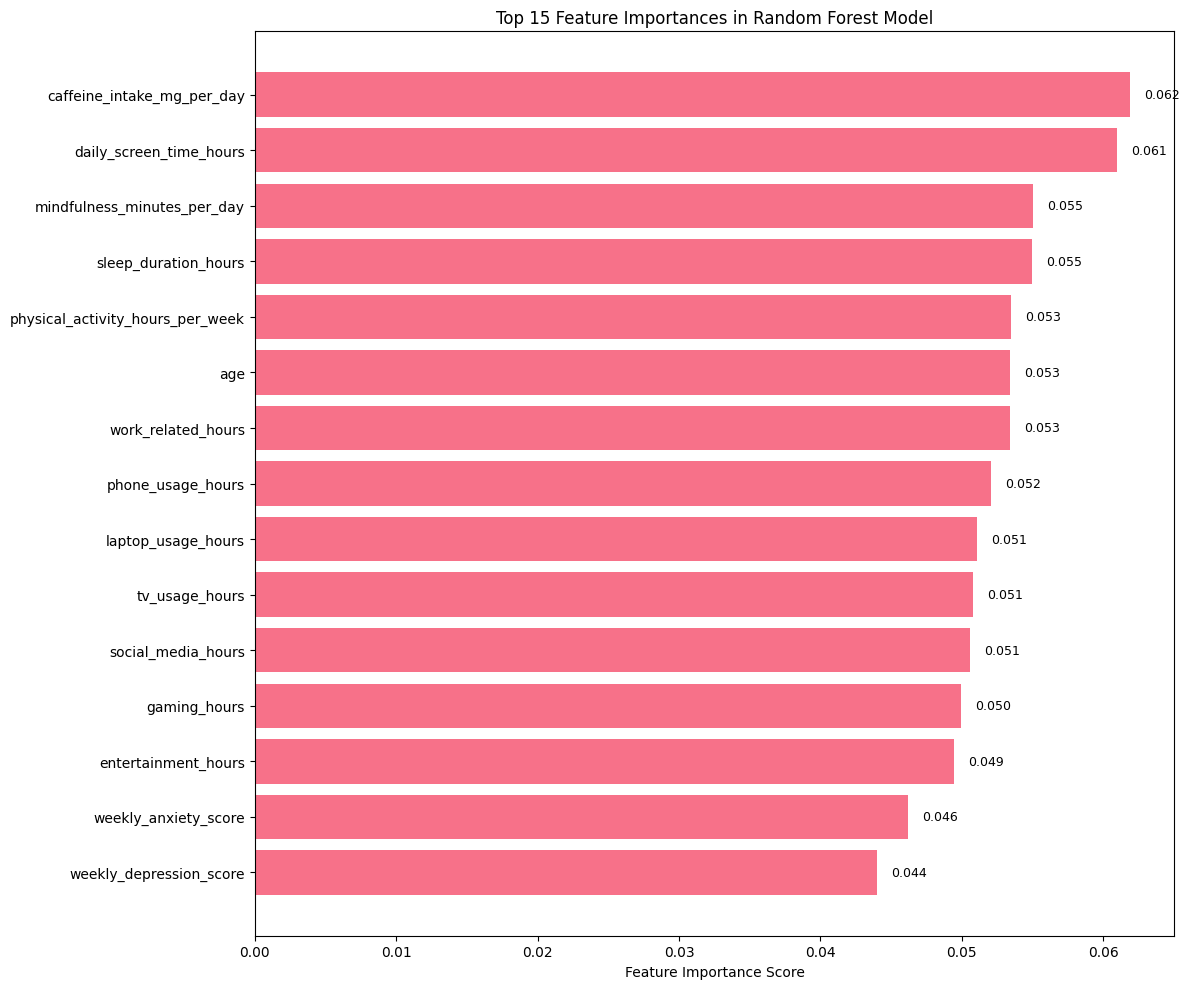


FEATURE IMPORTANCE BY CATEGORY:
Categorical features: 0.0461
Numerical features:   0.7388
Ordinal features:  0.1955
Binary features:      0.0196


In [ ]:
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importances from the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("="*50)
for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:35s}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Analyze feature importance by category
print(f"\nFEATURE IMPORTANCE BY CATEGORY:")
print("="*40)

def get_category_importance(features, feature_list):
    return feature_importance[feature_importance['feature'].isin(feature_list)]['importance'].sum()

cat_importance = get_category_importance(feature_importance, categorical_features)
num_importance = get_category_importance(feature_importance, numerical_features)
ord_importance = get_category_importance(feature_importance, ordinal_features)
bin_importance = get_category_importance(feature_importance, binary_features)

print(f"Categorical features: {cat_importance:.4f}")
print(f"Numerical features:   {num_importance:.4f}")
print(f"Ordinal features:  {ord_importance:.4f}")
print(f"Binary features:      {bin_importance:.4f}")


# SECTION 13: Prediction Analysis and Visualization

PREDICTION ANALYSIS & VISUALIZATION


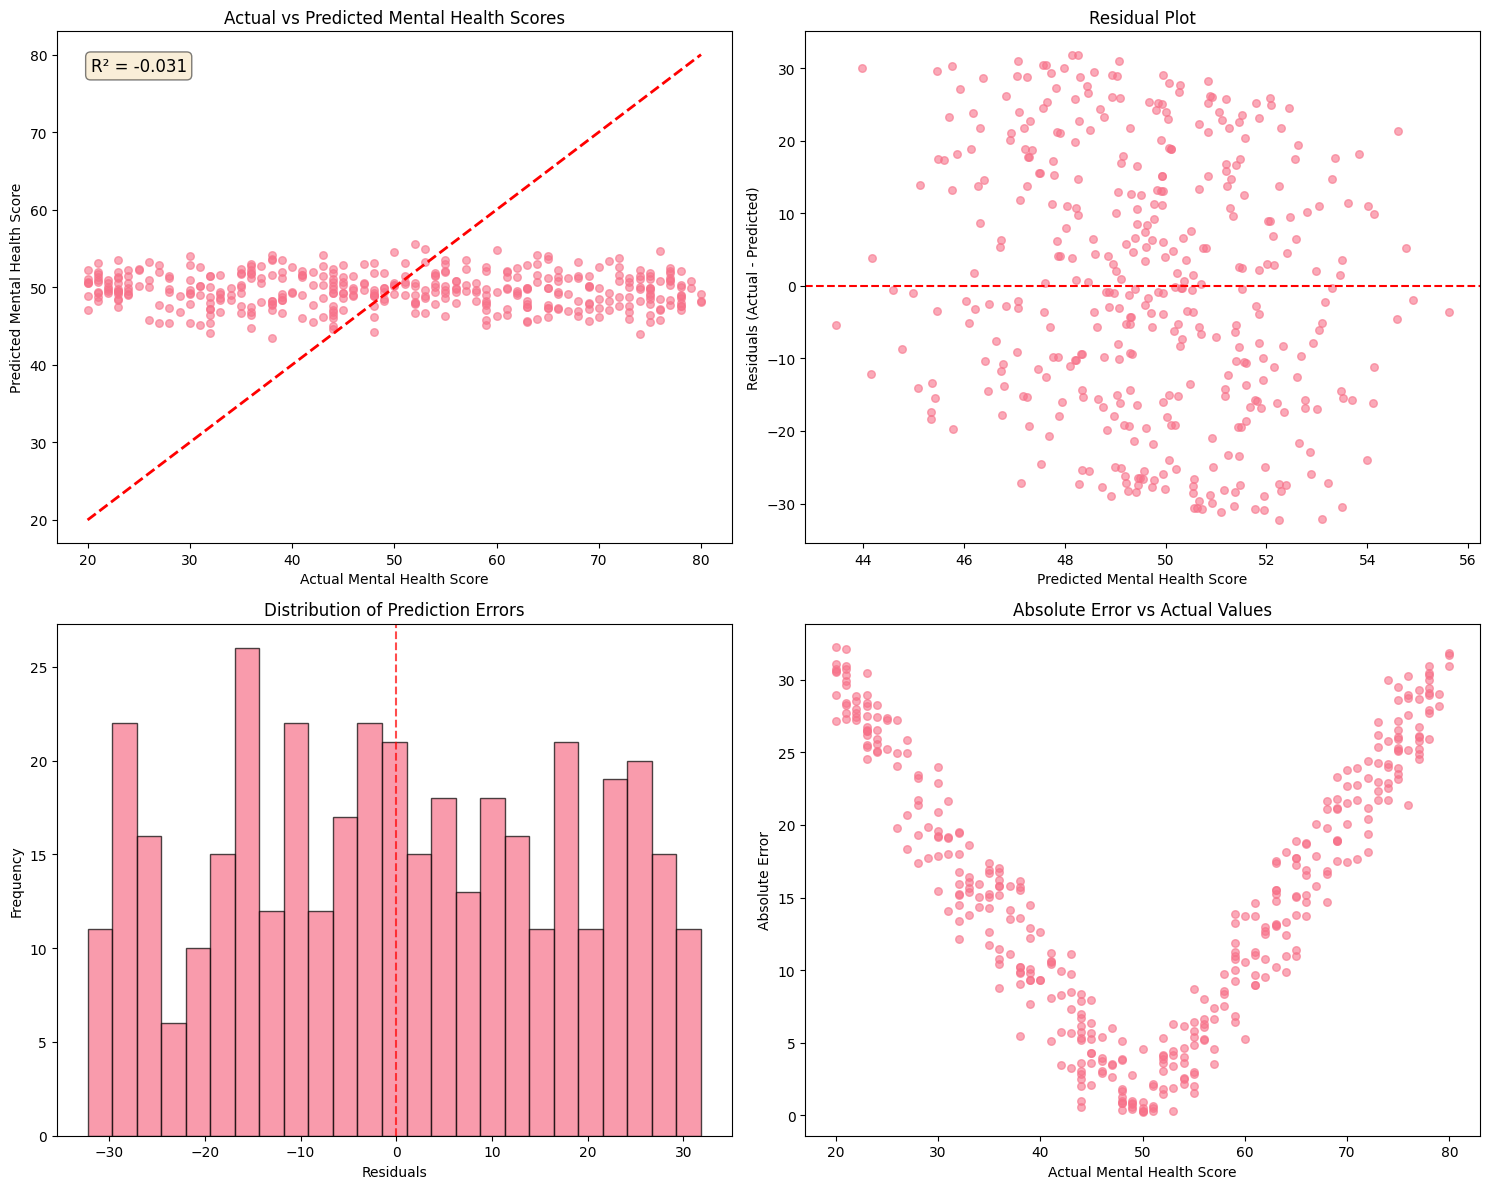

PREDICTION ERROR ANALYSIS:
Mean residual:             0.1032
Std residual:             17.9112
Min residual:            -32.2553
Max residual:             31.8528
Mean absolute error:      15.3125
95% of errors within:    ± 29.6834


In [ ]:
print("="*60)
print("PREDICTION ANALYSIS & VISUALIZATION")
print("="*60)

# Create comprehensive prediction analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted scatter plot
axes[0,0].scatter(y_test, y_pred_test_best, alpha=0.6, s=30)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Mental Health Score')
axes[0,0].set_ylabel('Predicted Mental Health Score')
axes[0,0].set_title('Actual vs Predicted Mental Health Scores')

# Add R² score to the plot
axes[0,0].text(0.05, 0.95, f'R² = {test_r2_best:.3f}',
               transform=axes[0,0].transAxes, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Residual plot
residuals = y_test - y_pred_test_best
axes[0,1].scatter(y_pred_test_best, residuals, alpha=0.6, s=30)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Mental Health Score')
axes[0,1].set_ylabel('Residuals (Actual - Predicted)')
axes[0,1].set_title('Residual Plot')

# 3. Residual distribution
axes[1,0].hist(residuals, bins=25, edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Prediction Errors')
axes[1,0].axvline(x=0, color='r', linestyle='--', alpha=0.7)

# 4. Prediction error by actual value
axes[1,1].scatter(y_test, np.abs(residuals), alpha=0.6, s=30)
axes[1,1].set_xlabel('Actual Mental Health Score')
axes[1,1].set_ylabel('Absolute Error')
axes[1,1].set_title('Absolute Error vs Actual Values')

plt.tight_layout()
plt.show()

# Calculate and display error statistics
print(f"PREDICTION ERROR ANALYSIS:")
print("="*30)
print(f"Mean residual:           {residuals.mean():8.4f}")
print(f"Std residual:            {residuals.std():8.4f}")
print(f"Min residual:            {residuals.min():8.4f}")
print(f"Max residual:            {residuals.max():8.4f}")
print(f"Mean absolute error:     {np.abs(residuals).mean():8.4f}")
print(f"95% of errors within:    ±{np.percentile(np.abs(residuals), 95):8.4f}")


# SECTION 14: Model Performance Summary

In [ ]:
print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)

print(f"FINAL RANDOM FOREST MODEL RESULTS:")
print("="*50)
print(f"• Test R² Score:        {test_r2_best:.4f}")
print(f"• Test RMSE:            {test_rmse_best:.4f} points")
print(f"• Test MAE:             {test_mae_best:.4f} points")
print(f"• Model explains        {test_r2_best*100:.1f}% of variance in mental health scores")
print(f"• Average prediction error: ±{test_mae_best:.1f} points on 0-100 scale")

print(f"\n🔧 BEST HYPERPARAMETERS:")
print("="*30)
for param, value in grid_search.best_params_.items():
    print(f"• {param}: {value}")

print(f"\n🏆 TOP 10 MOST IMPORTANT FEATURES:")
print("="*40)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

print(f"\nMODEL INTERPRETATION:")
print("="*25)
if test_r2_best >= 0.8:
    print("Excellent model performance (R² ≥ 0.8)")
elif test_r2_best >= 0.6:
    print("Good model performance (R² ≥ 0.6)")
elif test_r2_best >= 0.4:
    print(" Moderate model performance (R² ≥ 0.4)")
else:
    print("Poor model performance (R² < 0.4)")

print(f"\n PRACTICAL MEANING:")
print("="*20)
print(f"On average, predictions are within ±{test_mae_best:.1f} points of actual mental health scores.")
print(f"For a score of 70, the model typically predicts between {70-test_mae_best:.1f} and {70+test_mae_best:.1f}")

print(f"\n Model training and evaluation completed successfully.")

FINAL MODEL PERFORMANCE SUMMARY
🎯 FINAL RANDOM FOREST MODEL RESULTS:
• Test R² Score:        -0.0306
• Test RMSE:            17.8891 points
• Test MAE:             15.3125 points
• Model explains        -3.1% of variance in mental health scores
• Average prediction error: ±15.3 points on 0-100 scale

🔧 BEST HYPERPARAMETERS:
• max_depth: 20
• max_features: log2
• min_samples_leaf: 2
• min_samples_split: 5
• n_estimators: 100

🏆 TOP 10 MOST IMPORTANT FEATURES:
1. caffeine_intake_mg_per_day: 0.0619
2. daily_screen_time_hours: 0.0610
3. mindfulness_minutes_per_day: 0.0550
4. sleep_duration_hours: 0.0550
5. physical_activity_hours_per_week: 0.0535
6. age: 0.0534
7. work_related_hours: 0.0534
8. phone_usage_hours: 0.0520
9. laptop_usage_hours: 0.0511
10. tv_usage_hours: 0.0508

📊 MODEL INTERPRETATION:
❌ Poor model performance (R² < 0.4)

🎯 PRACTICAL MEANING:
On average, predictions are within ±15.3 points of actual mental health scores.
For a score of 70, the model typically predicts between